# **ASSIGNMENT 2: Portfolio Frontier Plot**

## Importing libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing datsets

Stocks data of three companies : Google , Hindustan Unilever , Reliance Industries

The stock data is of one year , i.e. 15th June 2020 - 15th June 2021.

In [5]:
google=pd.read_csv("GOOG.csv",index_col="Date")

google.drop(["Open","Close","High","Low","Volume"],axis=1,inplace=True)
hul=pd.read_csv("hul.csv",index_col="Date")

hul.drop(["Open","Close","High","Low","Volume"],axis=1,inplace=True)
rel=pd.read_csv("rel.csv",index_col="Date")
rel.head()
rel.drop(["Open","Close","High","Low","Volume"],axis=1,inplace=True)
print(google.shape)
print(hul.shape)

(252, 1)
(251, 1)


Merging the three different dataframes into one dataframe.

In [6]:
google.reset_index(drop=True, inplace=True)
hul.reset_index(drop=True, inplace=True)
rel.reset_index(drop=True, inplace=True)
stocks=pd.concat([google,hul,rel],axis=1)
stocks.columns=['Google','HUL',"Reliance"]
stocks.dropna(inplace=True)
stocks

,Google,HUL,Reliance
0,1419.849976,2033.386597,1603.352539
1,1442.719971,2025.630859,1606.480469
2,1451.119995,2027.484253,1604.146851
3,1435.959961,2014.899658,1644.415771
4,1431.719971,2055.563965,1747.197876
...,...,...,...
246,2466.090088,2342.053955,2207.498779
247,2482.850098,2339.075439,2168.025635
248,2491.399902,2361.711670,2176.000000
249,2521.600098,2349.500000,2213.149902


Calculating logarithmic returns of each day and dropping Nan values from the dataset

In [7]:

stocks=np.log(stocks/stocks.shift(1))
#stocks.dropna(inplace=True)
stocks.shape

(250, 3)

In [ ]:
stocks.describe()

,Google,HUL,Reliance
count,249.000000,249.000000,249.000000
mean,0.002294,0.000606,0.001352
std,0.017835,0.012752,0.019224
min,-0.058155,-0.038754,-0.090118
25%,-0.006450,-0.007164,-0.009372
50%,0.002892,-0.000842,0.001949
75%,0.012518,0.009287,0.011730
max,0.071353,0.042792,0.068245


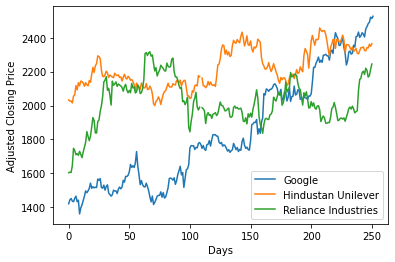

In [11]:
plt.plot(google,label="Google")
plt.plot(hul,label="Hindustan Unilever")
plt.plot(rel,label="Reliance Industries")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Adjusted Closing Price")
plt.show()

## Defining various functions 

In [ ]:
def portfolio_return(weights):
  return np.dot(weights,er)
def portfolio_std(weights):
  return np.dot(np.dot(stocks.cov(),weights),weights)**(1/2)*np.sqrt(249)



In [ ]:
def create():
  wts=np.random.random(3)
  wts/=wts.sum()
  return wts



### Calculating returns and standard deviation for random weights .

In [ ]:
returns=[]
std=[]
w=[]  

for i in range(500):
  wt=create()
  returns.append(portfolio_return(wt))
  std.append(portfolio_std(wt))
  w.append(wt)


## **Plotting Scatter Plot**

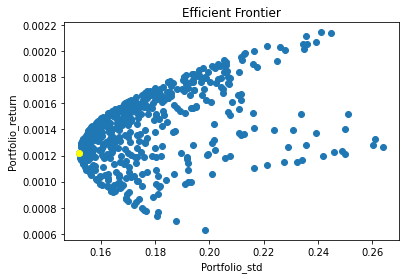

In [ ]:
plt.scatter(std,returns)
plt.scatter(min(std),returns[std.index(min(std))],c="yellow")
plt.scatter(stocks.std.iloc[0]*np.sqrt(252),stocks.mean.iloc[0])
plt.scatter()
plt.title("Efficient Frontier")
plt.xlabel("Portfolio_std")
plt.ylabel("Portfolio_return")
plt.show()

## Ideal weights for the portfolio

In [ ]:
print(w[std.index(min(std))])

[0.27355023 0.52020329 0.20624647]


Hence , We obtain a distribution of weights for three different companies , The amount of share for each is as follows :

**Google** : **27.355023%**

**Hindustam Unilever** : **52.020329%**

**Reliance Industries** : **20.624647%**